# Exploratory Data Analysis (EDA) of Boston Housing Prices

## Introduction

In this Colab notebook, we will conduct an Exploratory Data Analysis (EDA) on the Boston housing dataset. The primary goal is to gain insights into the structure of the data and understand the characteristics of various features that may influence housing prices in Boston.

## Dataset Overview

The dataset comprises 506 entries, each representing a distinct town or suburb in Boston. There are 13 features describing different aspects of these locations, and the target variable is the house price. Key features include crime rate, residential land proportions, business acreage, proximity to the Charles River, nitric oxides concentration, average number of rooms, and more.

## Steps in the Colab Notebook

1. **Data Loading:** Import and load necessary libraries, and load the Boston housing dataset for exploration.

2. **Missing Values:** Check for any missing values in the dataset.

4. **Data Visualization:** Utilize visualizations such as histograms, box plots, and scatter plots to visualize the distribution of features and explore potential relationships with housing prices.

5. **Correlation Analysis:** Investigate the correlation between different features and the target variable to identify strong predictors.

6. **Outlier Detection:** Identify and analyze potential outliers in the data that may impact model performance.


By focusing on exploratory data analysis, we aim to uncover patterns, anomalies, and relationships within the Boston housing dataset, laying the foundation for informed decision-making in later stages of the analysis.

## Data Loading

Import and load the necessary libraries and the Boston housing dataset.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import pickle


%matplotlib inline

In [2]:
boston_file = 'housing.csv'


1. **CRIM:** Per capita crime rate by town.
2. **ZN:** Proportion of residential land zoned for lots over 25,000 sq.ft.
3. **INDUS:** Proportion of non-retail business acres per town.
4. **CHAS:** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
5. **NOX:** Nitric oxides concentration (parts per 10 million).
6. **RM:** Average number of rooms per dwelling.
7. **AGE:** Proportion of owner-occupied units built prior to 1940.
8. **DIS:** Weighted distances to five Boston employment centers.
9. **RAD:** Index of accessibility to radial highways.
10. **TAX:** Full-value property-tax rate per $10,000.
11. **PTRATIO:** Pupil-teacher ratio by town.
12. **B:** \(1000(Bk - 0.63)^2\) where Bk is the proportion of blacks by town.
13. **LSTAT:** Percentage of the lower status of the population.

In [3]:
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'Price']


In [4]:
dataset = pd.read_csv(boston_file, header=None, names=feature_names, delim_whitespace=True)



## Missing value

In [5]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [6]:
# Dimension of the dataset
print(np.shape(dataset))

(506, 14)


In [7]:
dataset.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
Price      float64
dtype: object

In [8]:
## Summarizing The Stats of the data
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
## Check the missing Values
dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

## Data Visualization

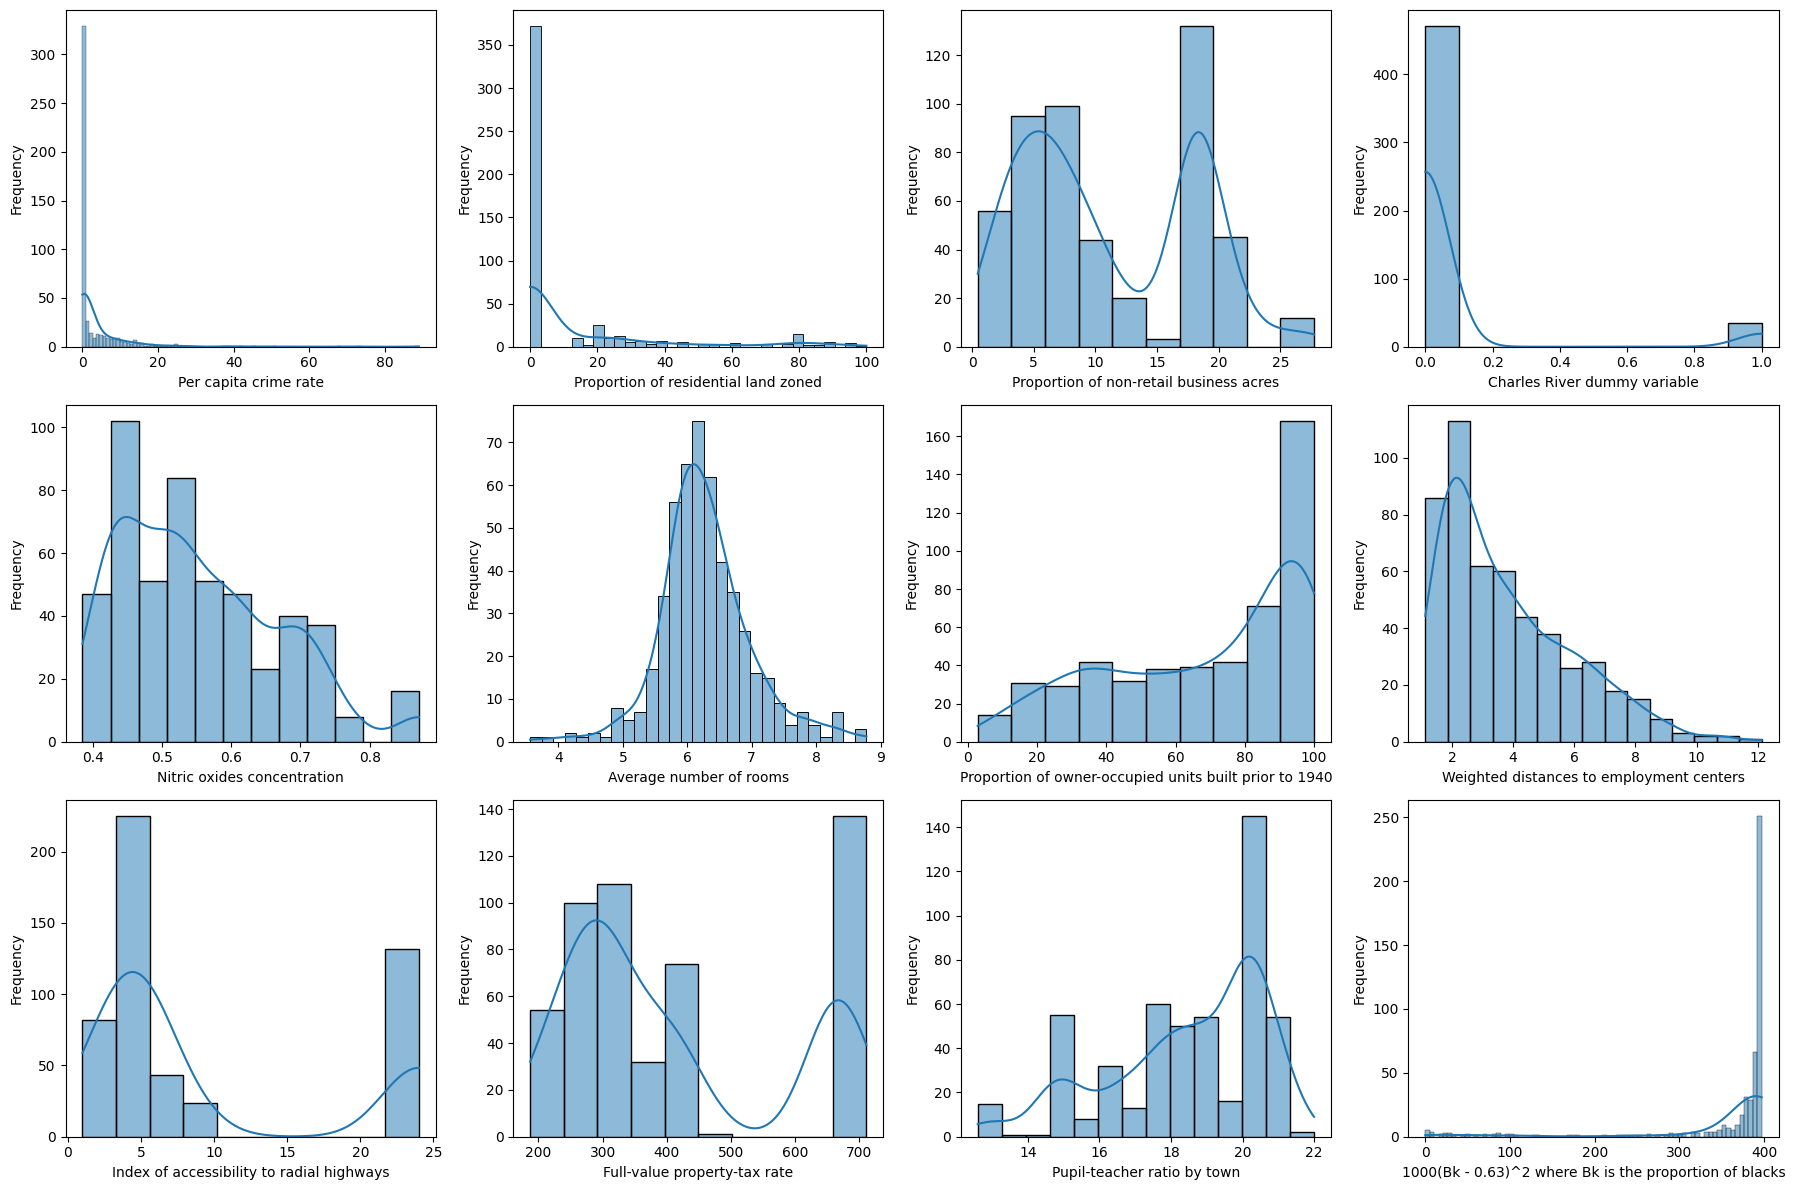

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up a 3x4 grid for subplots
fig, axes = plt.subplots(3, 4, figsize=(18, 12))

# Visualizing the distribution of features
sns.histplot(dataset['CRIM'], kde=True, ax=axes[0, 0])
axes[0, 0].set(xlabel='Per capita crime rate', ylabel='Frequency')

sns.histplot(dataset['ZN'], kde=True, ax=axes[0, 1])
axes[0, 1].set(xlabel='Proportion of residential land zoned', ylabel='Frequency')

sns.histplot(dataset['INDUS'], kde=True, ax=axes[0, 2])
axes[0, 2].set(xlabel='Proportion of non-retail business acres', ylabel='Frequency')

sns.histplot(dataset['CHAS'], kde=True, ax=axes[0, 3])
axes[0, 3].set(xlabel='Charles River dummy variable', ylabel='Frequency')

sns.histplot(dataset['NOX'], kde=True, ax=axes[1, 0])
axes[1, 0].set(xlabel='Nitric oxides concentration', ylabel='Frequency')

sns.histplot(dataset['RM'], kde=True, ax=axes[1, 1])
axes[1, 1].set(xlabel='Average number of rooms', ylabel='Frequency')

sns.histplot(dataset['AGE'], kde=True, ax=axes[1, 2])
axes[1, 2].set(xlabel='Proportion of owner-occupied units built prior to 1940', ylabel='Frequency')

sns.histplot(dataset['DIS'], kde=True, ax=axes[1, 3])
axes[1, 3].set(xlabel='Weighted distances to employment centers', ylabel='Frequency')

sns.histplot(dataset['RAD'], kde=True, ax=axes[2, 0])
axes[2, 0].set(xlabel='Index of accessibility to radial highways', ylabel='Frequency')

sns.histplot(dataset['TAX'], kde=True, ax=axes[2, 1])
axes[2, 1].set(xlabel='Full-value property-tax rate', ylabel='Frequency')

sns.histplot(dataset['PTRATIO'], kde=True, ax=axes[2, 2])
axes[2, 2].set(xlabel='Pupil-teacher ratio by town', ylabel='Frequency')

sns.histplot(dataset['B'], kde=True, ax=axes[2, 3])
axes[2, 3].set(xlabel='1000(Bk - 0.63)^2 where Bk is the proportion of blacks', ylabel='Frequency')

# Adjust layout for better readability
plt.tight_layout()


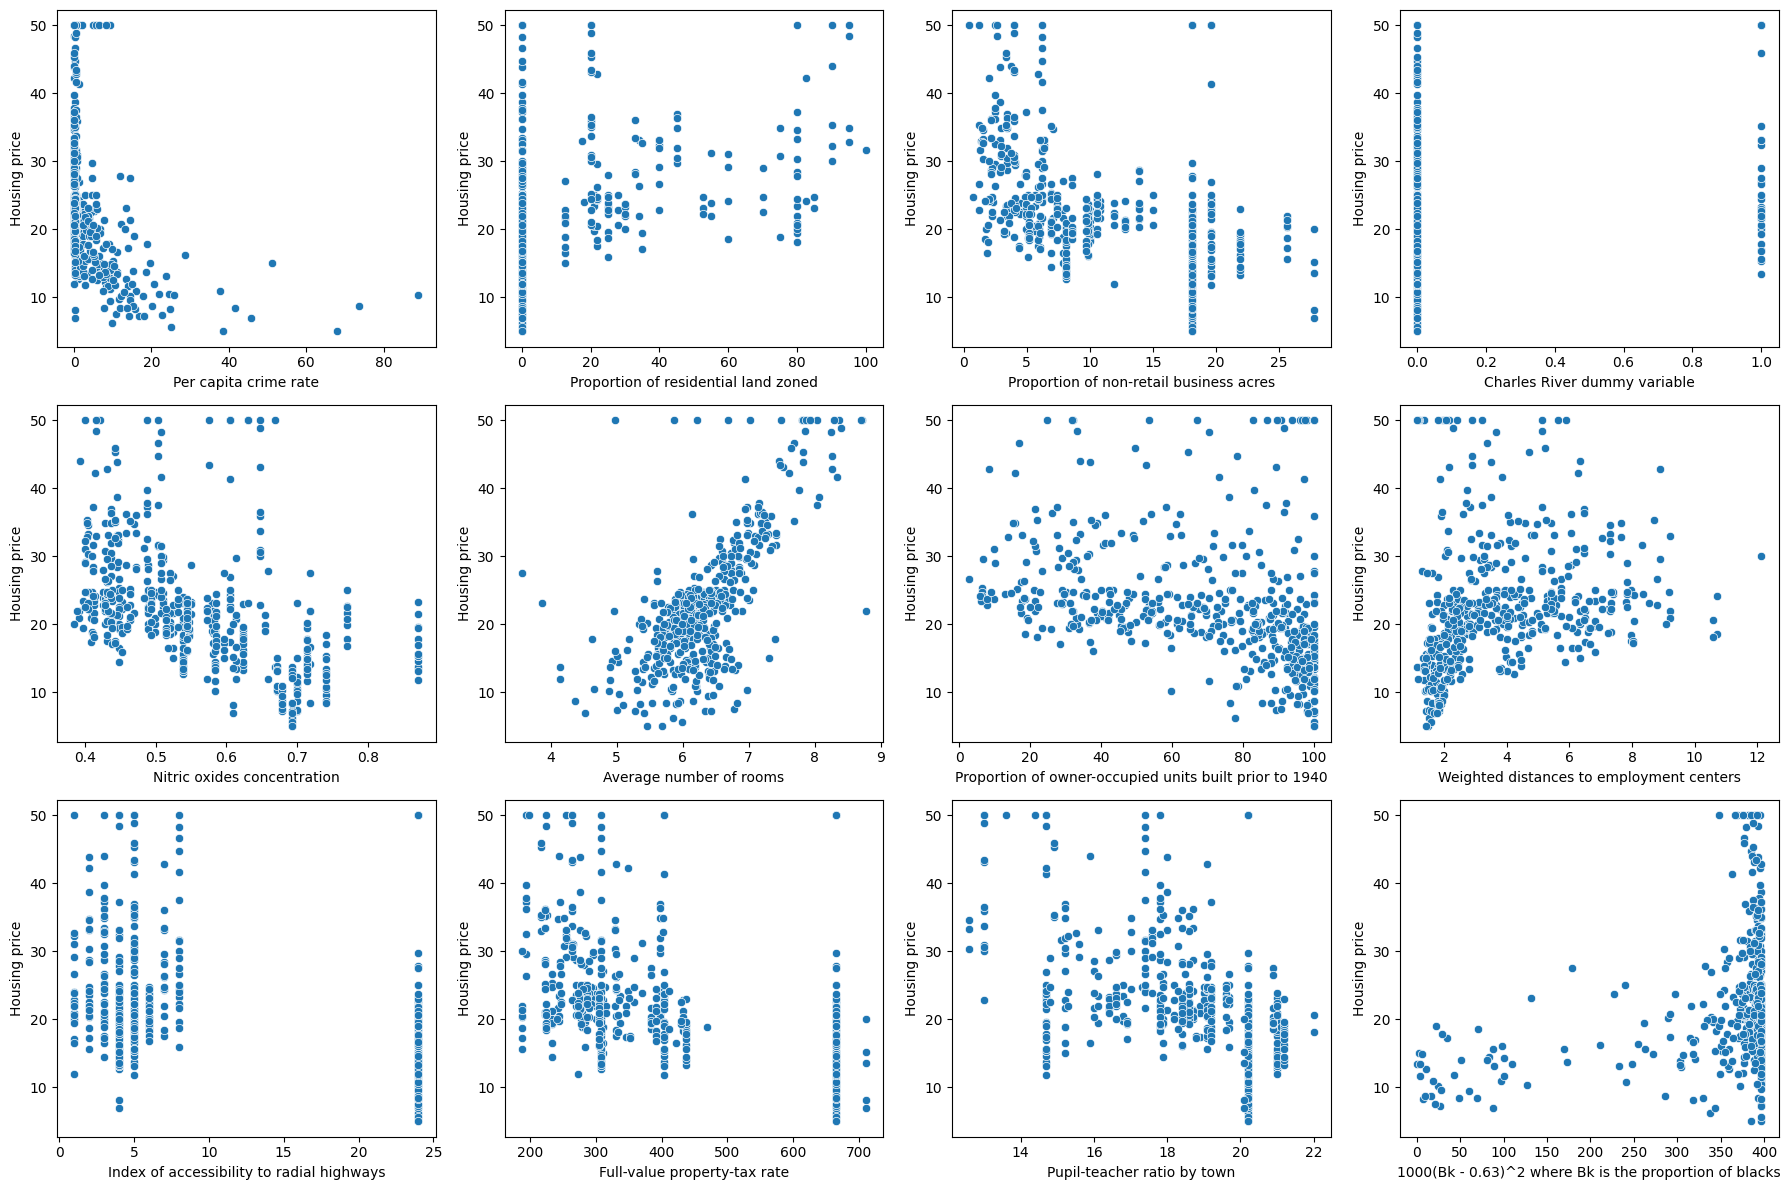

In [11]:

# Visualizing the relationships between features and housing prices
fig, axes = plt.subplots(3, 4, figsize=(18, 12))

sns.scatterplot(x=dataset['CRIM'], y=dataset['Price'], ax=axes[0, 0])
axes[0, 0].set(xlabel='Per capita crime rate', ylabel='Housing price')

sns.scatterplot(x=dataset['ZN'], y=dataset['Price'], ax=axes[0, 1])
axes[0, 1].set(xlabel='Proportion of residential land zoned', ylabel='Housing price')

sns.scatterplot(x=dataset['INDUS'], y=dataset['Price'], ax=axes[0, 2])
axes[0, 2].set(xlabel='Proportion of non-retail business acres', ylabel='Housing price')

sns.scatterplot(x=dataset['CHAS'], y=dataset['Price'], ax=axes[0, 3])
axes[0, 3].set(xlabel='Charles River dummy variable', ylabel='Housing price')

sns.scatterplot(x=dataset['NOX'], y=dataset['Price'], ax=axes[1, 0])
axes[1, 0].set(xlabel='Nitric oxides concentration', ylabel='Housing price')

sns.scatterplot(x=dataset['RM'], y=dataset['Price'], ax=axes[1, 1])
axes[1, 1].set(xlabel='Average number of rooms', ylabel='Housing price')

sns.scatterplot(x=dataset['AGE'], y=dataset['Price'], ax=axes[1, 2])
axes[1, 2].set(xlabel='Proportion of owner-occupied units built prior to 1940', ylabel='Housing price')

sns.scatterplot(x=dataset['DIS'], y=dataset['Price'], ax=axes[1, 3])
axes[1, 3].set(xlabel='Weighted distances to employment centers', ylabel='Housing price')

sns.scatterplot(x=dataset['RAD'], y=dataset['Price'], ax=axes[2, 0])
axes[2, 0].set(xlabel='Index of accessibility to radial highways', ylabel='Housing price')

sns.scatterplot(x=dataset['TAX'], y=dataset['Price'], ax=axes[2, 1])
axes[2, 1].set(xlabel='Full-value property-tax rate', ylabel='Housing price')

sns.scatterplot(x=dataset['PTRATIO'], y=dataset['Price'], ax=axes[2, 2])
axes[2, 2].set(xlabel='Pupil-teacher ratio by town', ylabel='Housing price')

sns.scatterplot(x=dataset['B'], y=dataset['Price'], ax=axes[2, 3])
axes[2, 3].set(xlabel='1000(Bk - 0.63)^2 where Bk is the proportion of blacks', ylabel='Housing price')

# Adjust layout for better readability
plt.tight_layout()

# Show the plots
plt.show()


## Correlation Analysis

<AxesSubplot:>

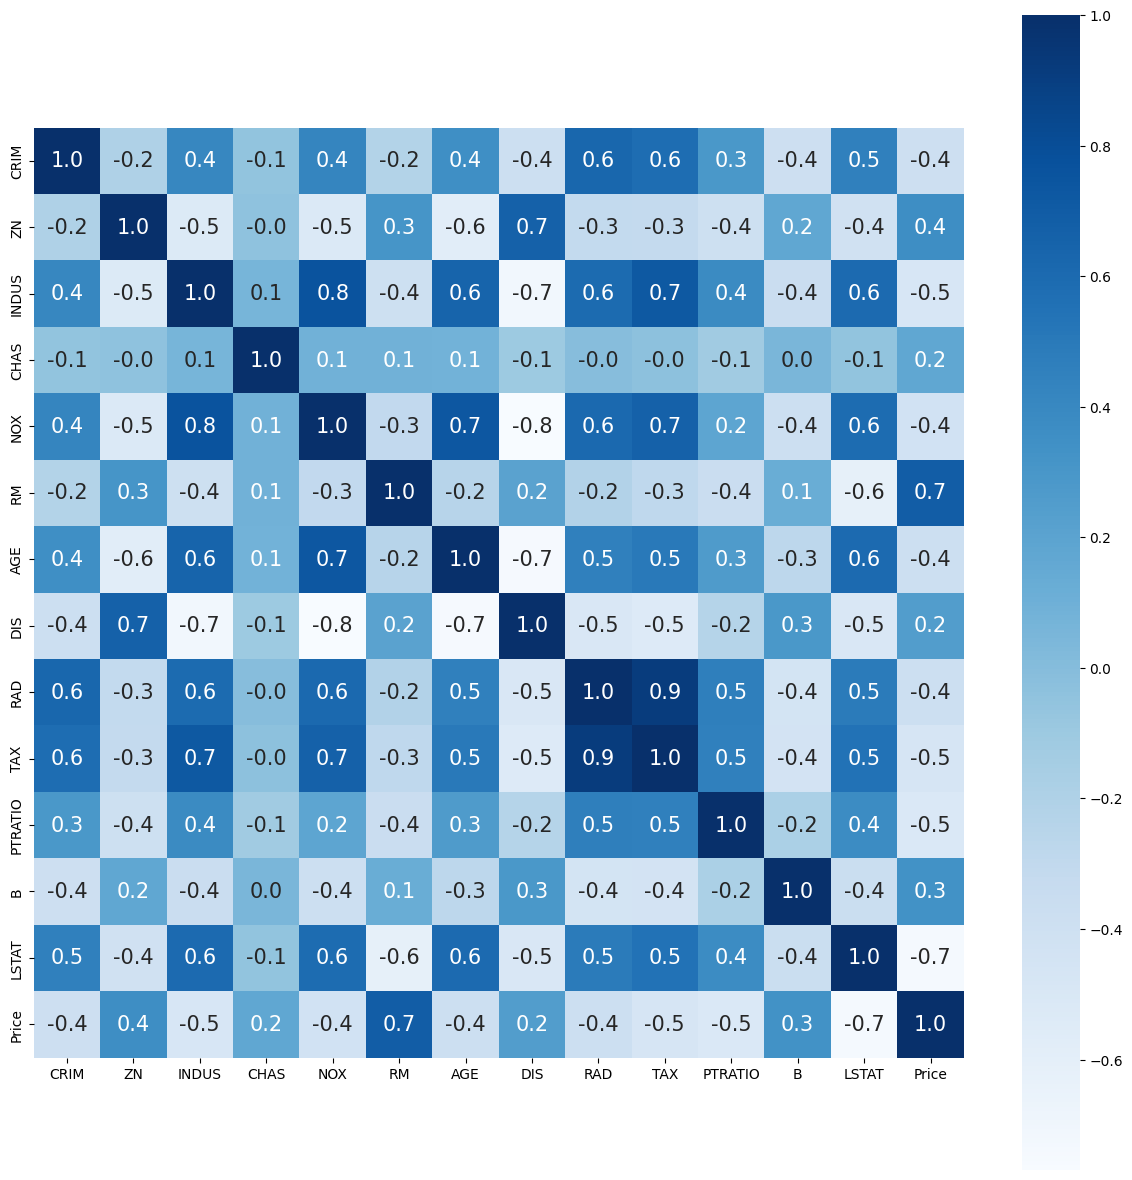

In [12]:
# Finding out the correlation between the features
corr = dataset.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Blues')

We will not remove any feature as none of them are highly correalated with each other.

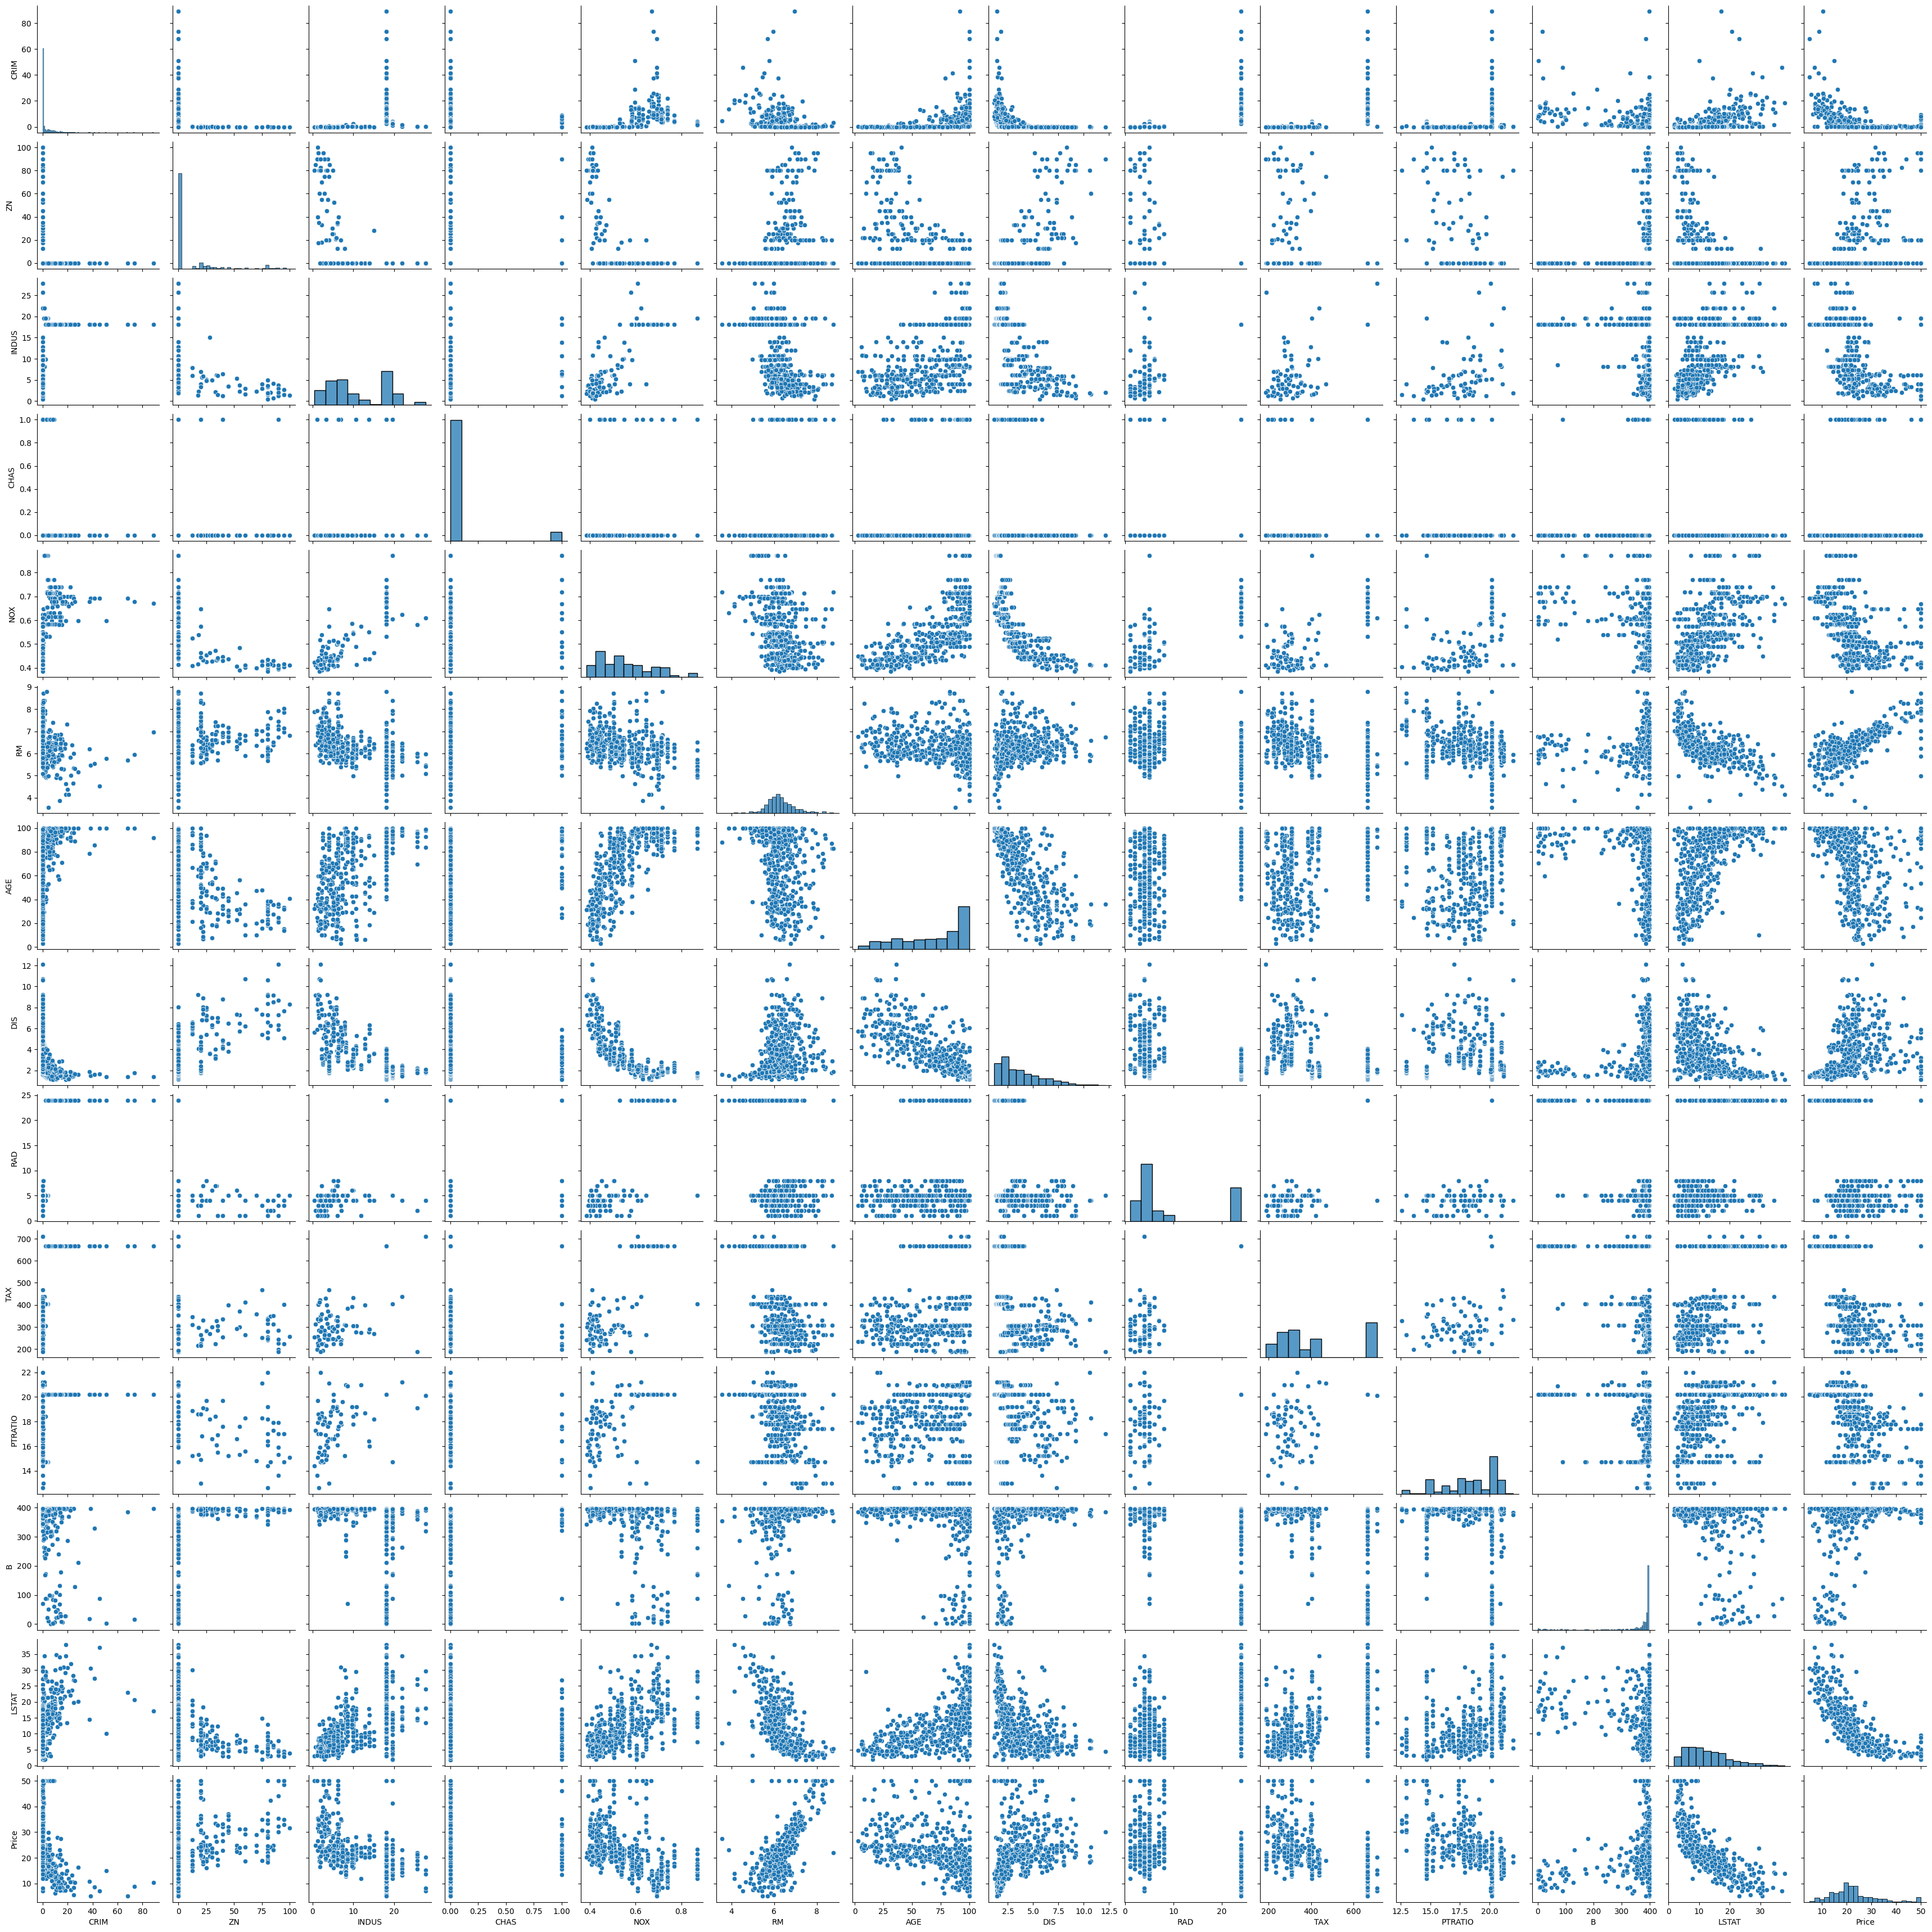

In [13]:
# plot to see correlation
sns.pairplot(dataset)

Text(0, 0.5, 'Price')

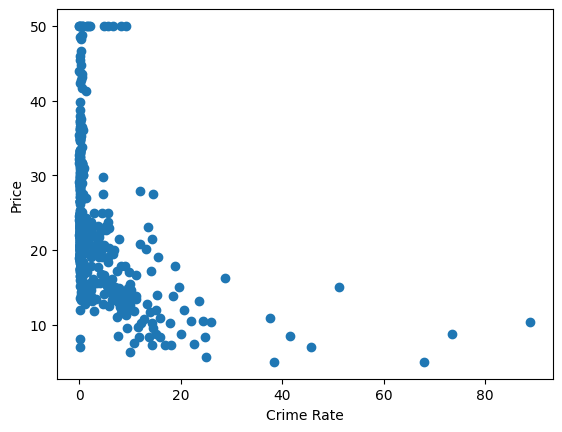

In [14]:
#Lets see the relationship between crime and price
plt.scatter(dataset['CRIM'],dataset['Price'])
plt.xlabel("Crime Rate")
plt.ylabel("Price")

Crime and price are inversly corelated.

Text(0, 0.5, 'Price')

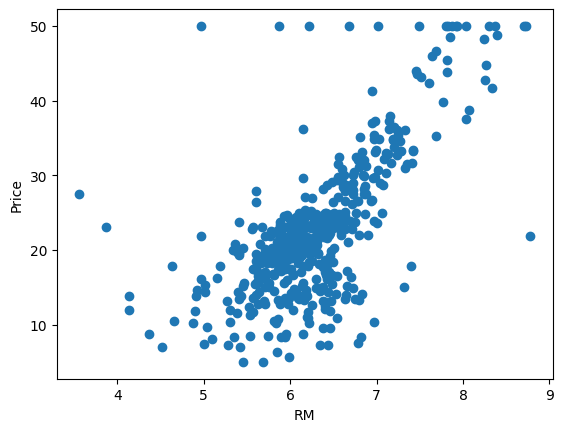

In [15]:
plt.scatter(dataset['RM'],dataset['Price'])
plt.xlabel("RM")
plt.ylabel("Price")

Available number of room and price are posirtively related

<AxesSubplot:xlabel='RM', ylabel='Price'>

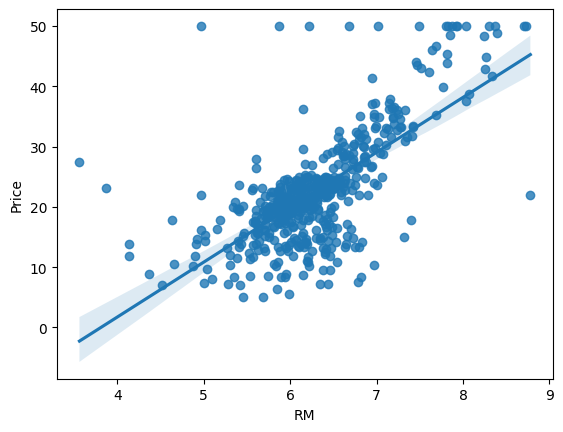

In [16]:
#Let's see a simple linear regression line
import seaborn as sns
sns.regplot(x="RM",y="Price",data=dataset)

<AxesSubplot:xlabel='LSTAT', ylabel='Price'>

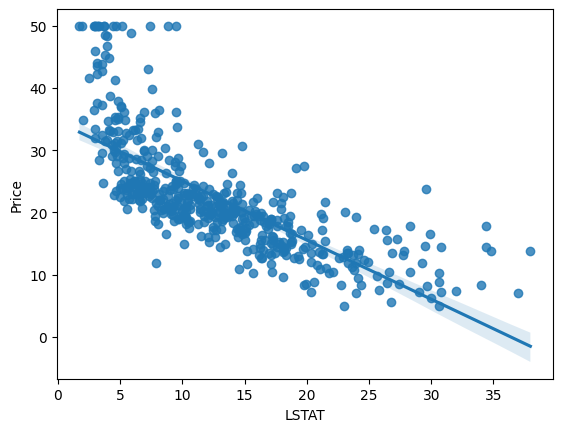

In [17]:
#
sns.regplot(x="LSTAT",y="Price",data=dataset)

<AxesSubplot:xlabel='CHAS', ylabel='Price'>

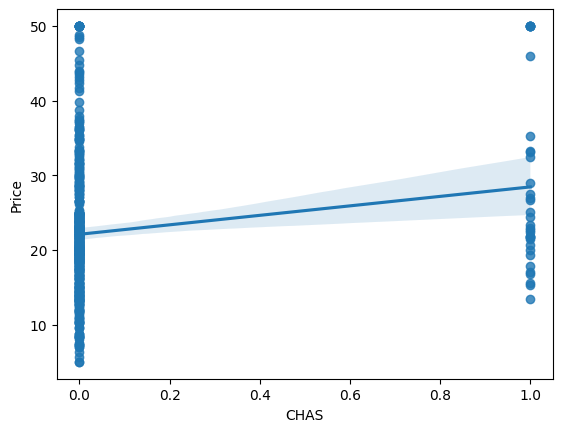

In [18]:
sns.regplot(x="CHAS",y="Price",data=dataset)

We can see that Charles River dummy variable and price is hardly correalated at all.

<AxesSubplot:xlabel='PTRATIO', ylabel='Price'>

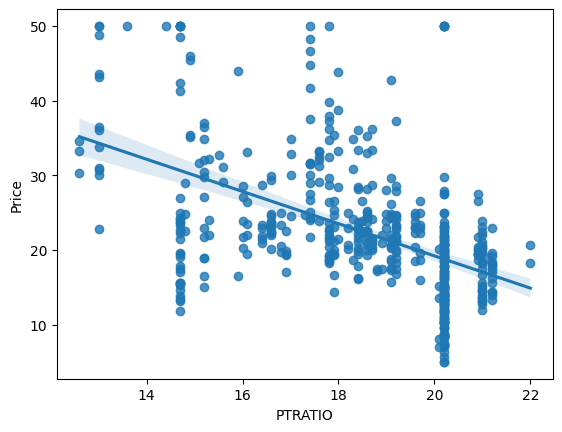

In [19]:
sns.regplot(x="PTRATIO",y="Price",data=dataset)

Here we can see people teach ratio and price are somewhat inversly related.

## Outlier check

NameError: name 'numeric_columns' is not defined

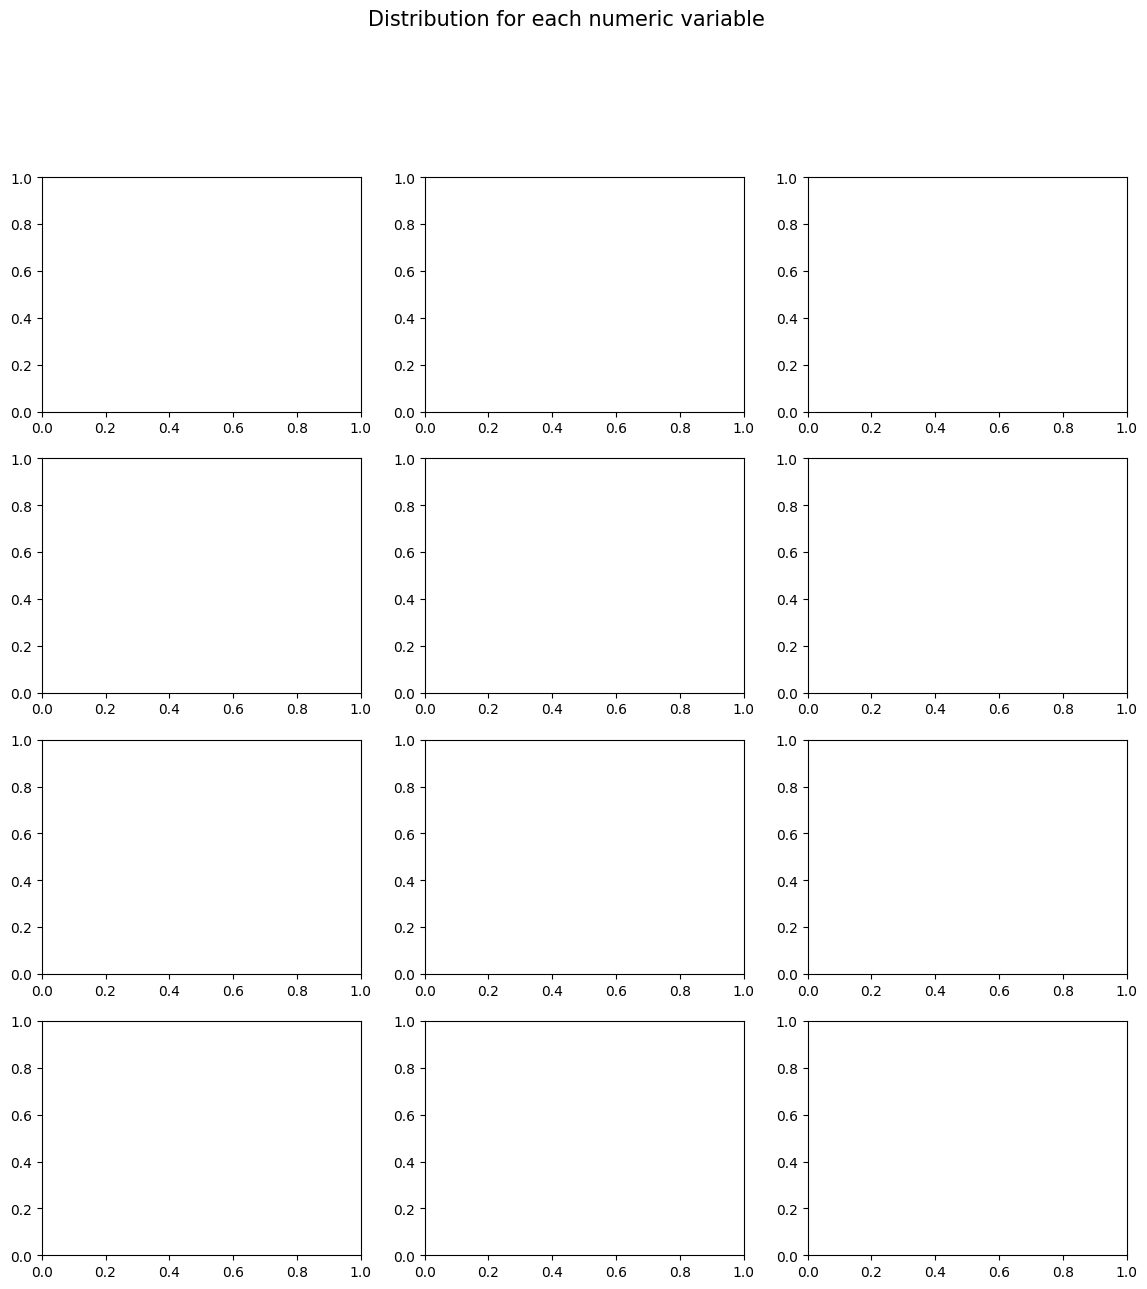

In [20]:
# Check if the data has any outlier

fig, axs = plt.subplots(4, 3, figsize=(14, 14))
fig.suptitle('Distribution for each numeric variable', y=1, size=15)
axs = axs.flatten()

for i, data in enumerate(numeric_columns):
    sns.boxplot(dataset[data].values, ax=axs[i], showmeans=True, meanprops={'linewidth': 1, 'color': 'red'})
    axs[i].set_title(data + ', skewness is ' + str(round(dataset[data].skew(axis=0, skipna=True), 2)))

plt.show()
plt.tight_layout()
